In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn import linear_model, metrics

In [38]:
np.arange(0, 1.1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [40]:
np.linspace(0.00, 1, 11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

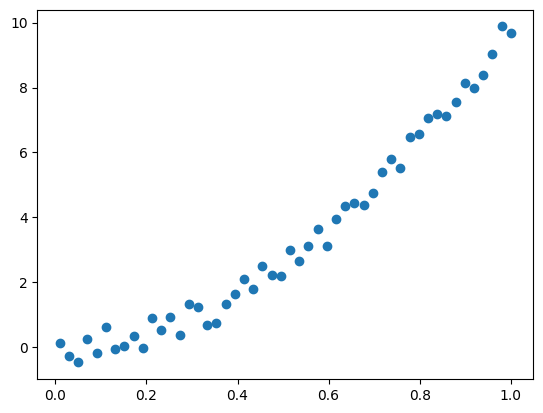

In [46]:
n = 50
x = np.linspace(0.01, 1, n)
y = 10* x*x + np.random.rand(n) - .5

x = x.reshape(-1,1)
y = y.reshape(-1,1)

plt.scatter(x,y)

In [5]:
x.shape, y.shape, np.linspace(0.01, 1, n).shape

((50, 1), (50, 1), (50,))

## Linear Regression

In [47]:
linear = linear_model.LinearRegression()

linear.fit(x, y)

linear.coef_, linear.intercept_

(array([[10.10314448]]), array([-1.69962083]))

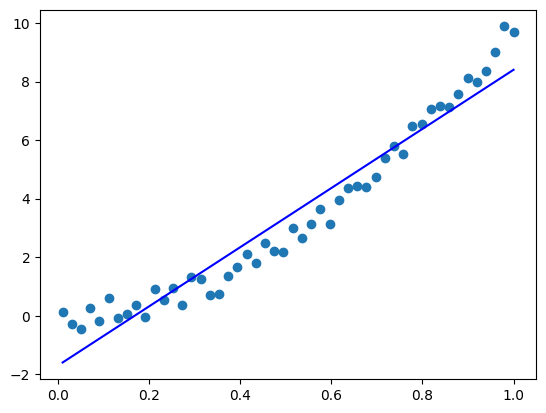

In [48]:
plt.scatter(x,y)
plt.plot(x, linear.predict(x), c='b')

Clearly Linear 1 degree (y = m x) don't fix exactly well

## Let's try $x^{10}$ polynomial!

In [49]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=10)

x_10 = poly.fit_transform(x)

In [51]:
x_10.shape

(50, 11)

In [50]:
x_10

array([[1.00000000e+00, 1.00000000e-02, 1.00000000e-04, 1.00000000e-06,
        1.00000000e-08, 1.00000000e-10, 1.00000000e-12, 1.00000000e-14,
        1.00000000e-16, 1.00000000e-18, 1.00000000e-20],
       [1.00000000e+00, 3.02040816e-02, 9.12286547e-04, 2.75547773e-05,
        8.32266744e-07, 2.51378527e-08, 7.59265755e-10, 2.29329248e-11,
        6.92667934e-13, 2.09213988e-14, 6.31911638e-16],
       [1.00000000e+00, 5.04081633e-02, 2.54098292e-03, 1.28086282e-04,
        6.45659422e-06, 3.25465056e-07, 1.64060957e-08, 8.27001148e-10,
        4.16876089e-11, 2.10139580e-12, 1.05927502e-13],
       [1.00000000e+00, 7.06122449e-02, 4.98608913e-03, 3.52078947e-04,
        2.48610848e-05, 1.75549701e-06, 1.23959585e-07, 8.75306455e-09,
        6.18073538e-10, 4.36435600e-11, 3.08176975e-12],
       [1.00000000e+00, 9.08163265e-02, 8.24760516e-03, 7.49017204e-04,
        6.80229909e-05, 6.17759816e-06, 5.61026771e-07, 5.09503905e-08,
        4.62712730e-09, 4.20218704e-10, 3.81627190e-

In [52]:
linear10 = linear_model.LinearRegression()

linear10.fit(x_10, y)

(linear10.coef_, linear.intercept_)

(array([[ 0.00000000e+00, -1.12635461e+01,  9.90633146e+01,
          7.87112074e+02, -1.28230768e+04,  6.77515534e+04,
         -1.87794490e+05,  3.01683405e+05, -2.82460795e+05,
          1.43117795e+05, -3.03395782e+04]]),
 array([-1.69962083]))

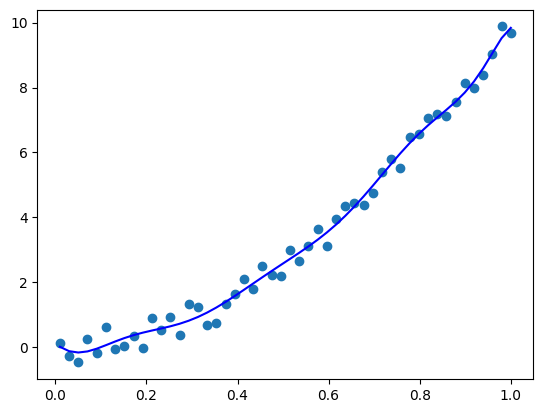

In [55]:
plt.scatter(x,y)
plt.plot(x, linear10.predict(x_10), c='b')

We can see that the non-ridge model fits points very well. But how does it fare for new points?

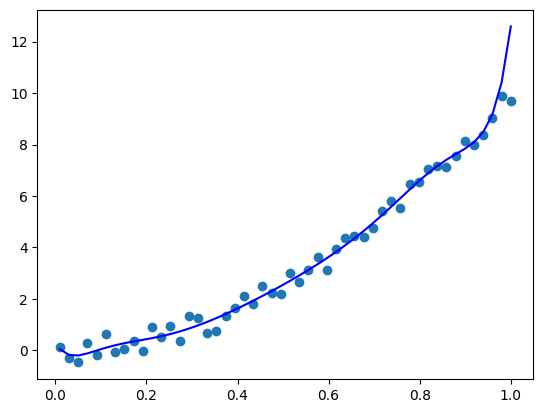

In [73]:
linear10 = linear_model.LinearRegression()

linear10.fit(x_10[:-4], y[:-4])

plt.scatter(x,y)
plt.plot(x, linear10.predict(x_10), c='b')

Clearly, the new predictions are not so great.

## Back to $x^2$ degree model 

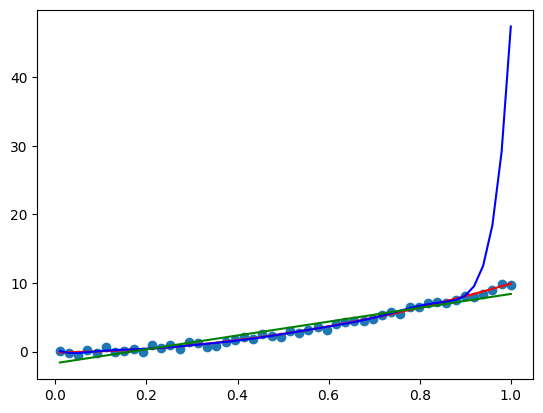

In [67]:
x_2 = PolynomialFeatures(degree=2).fit_transform(x)

linear2 = linear_model.LinearRegression().fit(x_2[:-4], y[:-4])

plt.scatter(x,y)
plt.plot(x, linear2.predict(x_2), c='r')
plt.plot(x, linear10.predict(x_10), c='b')
plt.plot(x, linear.predict(x), c='g')

## How do we measure the error?

## `x[-4:]` & `y[-4:]` is considered the "Test set"

In [68]:
metrics.mean_squared_error(y[-4:], linear10.predict(x_10[-4:]))

475.40378659976784

In [69]:
metrics.mean_squared_error(y[-4:], linear.predict(x[-4:]))

1.470988544251339

In [70]:
metrics.mean_squared_error(y[-4:], linear2.predict(x_2[-4:]))

0.08846709730374072

In [71]:
(
    metrics.mean_absolute_error(y[-4:], linear10.predict(x_10[-4:])), 
    metrics.mean_absolute_error(y[-4:], linear.predict(x[-4:])),
    metrics.mean_absolute_error(y[-4:], linear2.predict(x_2[-4:]))
)

(17.644398351383412, 1.1453298000353977, 0.27601214774131977)

In [72]:
(
    metrics.mean_absolute_percentage_error(y[-4:], linear10.predict(x_10[-4:])), 
    metrics.mean_absolute_percentage_error(y[-4:], linear.predict(x[-4:])),
    metrics.mean_absolute_percentage_error(y[-4:], linear2.predict(x_2[-4:]))
)

(1.8462840863230867, 0.12168224109346887, 0.030162361183942443)

## Using Random Sampling 

In [93]:
n = 100
x = np.linspace(0.01, 1, n)
y = 10* x*x + np.random.rand(n) - .5

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [94]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

linear = linear_model.LinearRegression().fit(xtrain, ytrain)

In [120]:
xtrain2 = PolynomialFeatures(degree=2).fit_transform(xtrain)
xtest2 = PolynomialFeatures(degree=2).fit_transform(xtest)

linear2 = linear_model.LinearRegression().fit(xtrain2, ytrain)

In [121]:
xtrain10 = PolynomialFeatures(degree=10).fit_transform(xtrain)
xtest10 = PolynomialFeatures(degree=10).fit_transform(xtest)

linear10 = linear_model.LinearRegression().fit(xtrain10, ytrain)

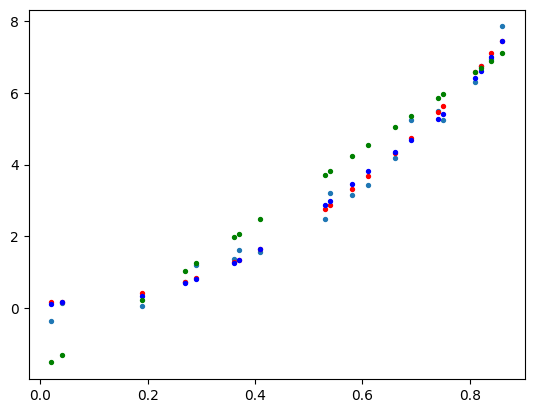

In [125]:
size = 8
plt.scatter(xtest, ytest, s=size)
plt.scatter(xtest, linear2.predict(xtest2), c='r', s=size)
plt.scatter(xtest, linear10.predict(xtest10), c='b', s=size)
plt.scatter(xtest, linear.predict(xtest), c='g', s=size)

In [126]:
(
    metrics.mean_squared_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_squared_error(ytest, linear.predict(xtest)),
    metrics.mean_squared_error(ytest, linear2.predict(xtest2))
)

(0.07975149011229464, 0.5661466703875766, 0.07907615210218713)

In [127]:
(
    metrics.mean_absolute_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_absolute_error(ytest, linear.predict(xtest)),
    metrics.mean_absolute_error(ytest, linear2.predict(xtest2))
)

(0.2393755608459868, 0.6174320355593893, 0.23224645837629856)

In [128]:
(
    metrics.mean_absolute_percentage_error(ytest, linear10.predict(xtest10)), 
    metrics.mean_absolute_percentage_error(ytest, linear.predict(xtest)),
    metrics.mean_absolute_percentage_error(ytest, linear2.predict(xtest2))
)

(0.32630036380461297, 0.9049999969088016, 0.3697894362228514)